In [34]:
import torch
from collections import deque
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('classic')

In [35]:
def plot_loss(
        lawn_num,
        run_id,
        reward_function,
        go_explore = 'False',
        save = False
        ):



    csv_path = f"../deepmower/PPO_logs/lawn{lawn_num}/go_explore_{go_explore}/reward_function{reward_function}/{run_id}_loss_plots.csv"

    #%%

    loss_data = pd.read_csv(csv_path, index_col = 'iter')
    loss_data['total_loss_10'] = loss_data['total_loss'].rolling(10).mean()
    loss_data['value_loss_10'] = loss_data['value_loss'].rolling(10).mean()
    loss_data['action_loss_10'] = loss_data['action_loss'].rolling(10).mean()
    loss_data['entropy_loss_10'] = loss_data['entropy_loss'].rolling(10).mean()
    #%%

    loss_data.dropna(inplace = True)
    #%%



    fig, ax3 = plt.subplots()
    ax3.plot(loss_data.index, loss_data['total_loss_10'], label='Total Loss')
    ax3.plot(loss_data.index, loss_data['entropy_loss_10'], label='Entropy')
    ax3.plot(loss_data.index, loss_data['value_loss_10'], label='Value')
    ax3.plot(loss_data.index, loss_data['action_loss_10'], label='Action')
    ax3.tick_params(axis='y', labelcolor='blue')

    ax3.set_xlabel('Update', color='black')

    ax3.legend()


    plt.title('Running average over previous 10 updates')
    plt.show()
    if save == True:
        #plt.savefig(figure_file_loss)
        plt.close()

In [36]:

def plot_reward(
        lawn_num,
        run_id,
        reward_function,
        go_explore = 'False',
        save = False
        ):



    csv_path = f"../deepmower/PPO_logs/lawn{lawn_num}/go_explore_{go_explore}/reward_function{reward_function}/{run_id}_reward_plots.csv"

    #%%

    reward_data = pd.read_csv(csv_path, index_col = 'iter')
    reward_data['rewards_100'] = reward_data['rewards'].rolling(100).mean()
    reward_data['perc_done_100'] = reward_data['perc_done'].rolling(100).mean()
    #%%

    reward_data.dropna(inplace = True)
    #%%


    suptitle = f"Lawn: {lawn_num}  Run: {run_id}  Reward Function: {reward_function}  Go Explore: {go_explore}"

    fig, ax1 = plt.subplots()
    ax1.set_ylabel('score', color='red')
    ax1.plot(reward_data.index, reward_data['rewards_100'], color='red', label = 'Score')
    ax1.tick_params(axis='y', labelcolor='red')

    ax1.set_xlabel('Run', color = 'black')


    #ax1.legend()

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'blue'
    ax2.set_ylabel('% Done', color=color)  # we already handled the x-label with ax1
    ax2.plot(reward_data.index, reward_data['perc_done_100'], color=color)
    ax2.tick_params(axis='y', labelcolor=color)


    plt.title('Running average over previous 100 runs')
    plt.suptitle(suptitle)
    #plt.show()
    if save == True:
        #plt.savefig(figure_file_loss)
        plt.close()

    return fig


In [50]:
lawn_num = 21
run_id = 4
reward_function = 0
go_explore = 'False'


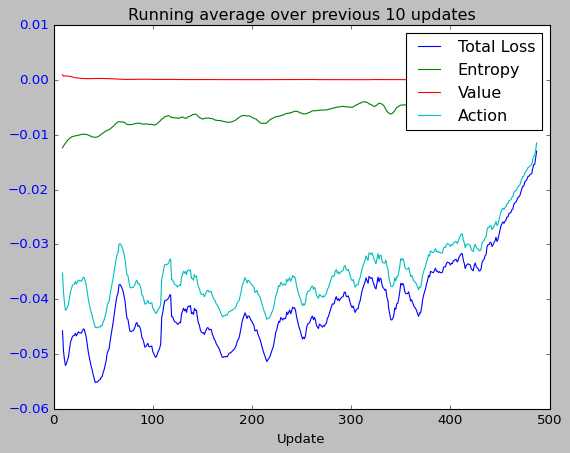

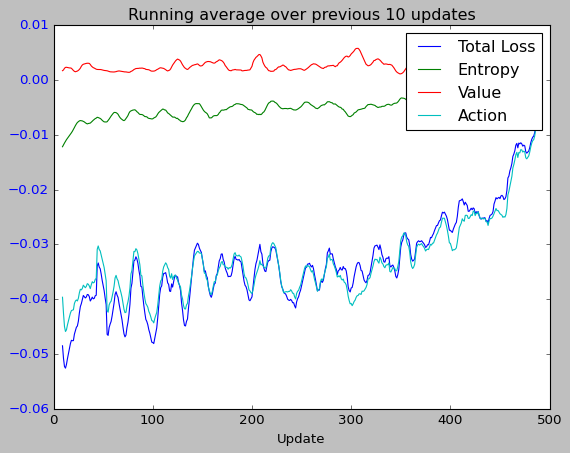

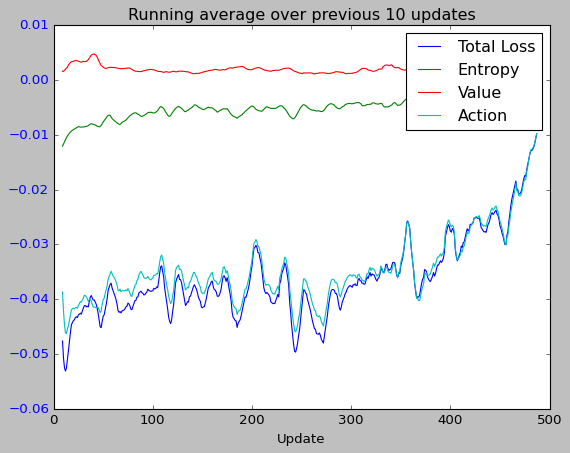

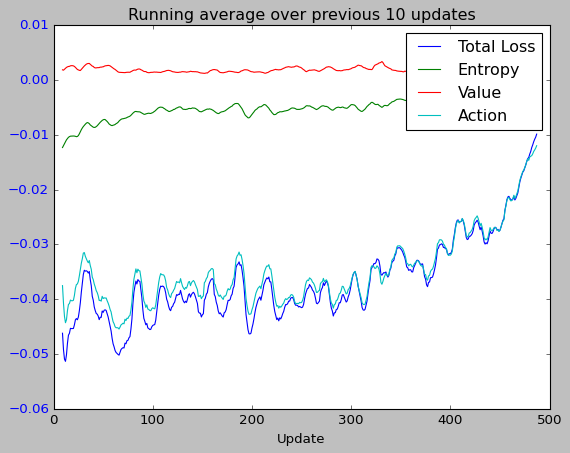

In [51]:
for reward_function in [0,1,2,3]:
    plot_loss(lawn_num = lawn_num,
          run_id = run_id,
          reward_function = reward_function,
          go_explore = 'False')

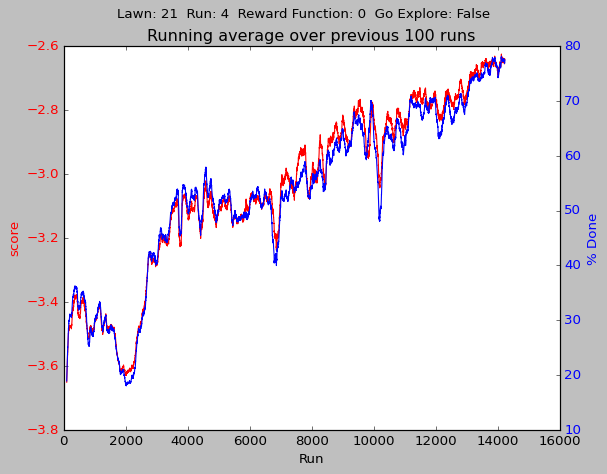

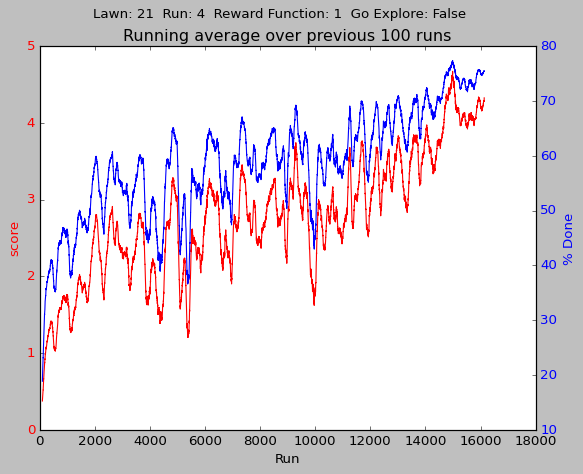

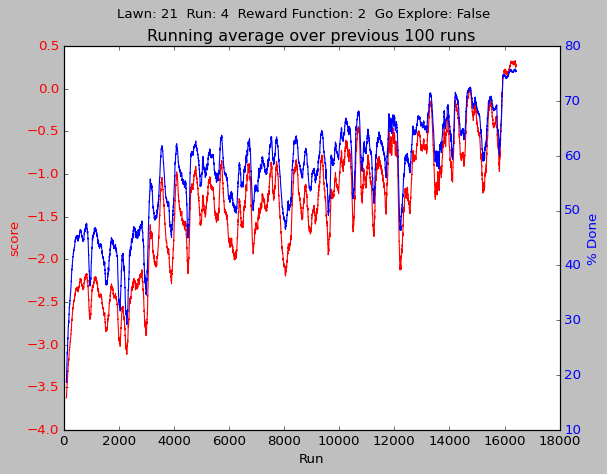

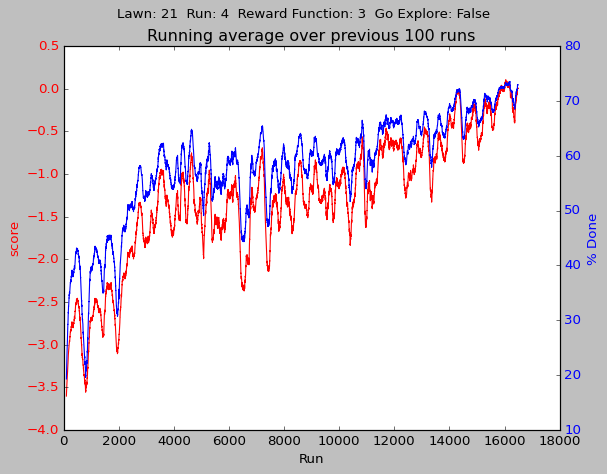

In [52]:
for reward_function in [0,1,2,3]:
    plot_reward(lawn_num = lawn_num,
          run_id = run_id,
          reward_function = reward_function,
          go_explore = 'False')